# Basic analysis pipline for a single recording

In [146]:
from Py2Rigs.rec import Rec
from Py2Rigs import sync,loader,plot
from Py2Rigs import plot
from matplotlib import pyplot as plt
import os
import shutil

In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Specify the paths for the data (see the Loader object for what type of data you can load), the sync and the stimulation sequence file and the behavioral data if needed.

In [149]:
rec_folder = r"test_data\demo1"

datapath = rec_folder+r"\suite2p\plane0"
syncfile = rec_folder+r"\rec_000_000.mat"       
stimdict = rec_folder+r"\stim_dict_PM_230224_OBO041194_000.json"
data_behav = rec_folder+r"\contra_pupil_000.npy"

# indicate how to decode the name of the trial types from the stimulation sequence file
trials_names = {0:"IPSI",1:"CONTRA",2:"BOTH"}

In [150]:
# create a Dataloader instance
dataloader = loader.Dataloader()
# load the syn
dataloader.load_sync(syncfile,stimdict,trials_names)
# load the neural data from a suite2p directory
dataloader.load_s2p_dir(datapath)
# load the behavioral data
dataloader.load_behav(data_behav, data_name='pupil_size')

> Sync object generated

> loading data from test_data\demo1\suite2p\plane0 ... Loaded data of size 1457x20000

> loading pupil_size ...OK


Extract the data and save them in a h5 file

In [178]:
# create a rec instance by feeding the the dataloader
rec = Rec(dataloader)
# extract the data
cells = rec.extract_all(save_hdf5_filename='demo1_extracted_data')

> Using the parameters file found in current dir.
> parameters loaded.

> Analyzing neural data ... 

  Extracting stim: full_field-4


    extracting trial: BOTH: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]  



  Extracting stim: full_field-1


    extracting trial: BOTH: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]  



  Extracting stim: full_field-3


    extracting trial: BOTH: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]  



  Extracting stim: full_field-2


    extracting trial: BOTH: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]  



  Extracting stim: full_field-5


    extracting trial: BOTH: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]  



> 246 responsive cells found (tot: 1457, keep_unresponsive: False, use_iscell: 0)

> Analyzing pupil_size data ... 

  Extracting stim: full_field-4


    extracting trial: BOTH: 100%|██████████| 3/3 [00:00<00:00, 599.93it/s]



  Extracting stim: full_field-1


    extracting trial: BOTH: 100%|██████████| 3/3 [00:00<00:00, 599.70it/s]



  Extracting stim: full_field-3


    extracting trial: BOTH: 100%|██████████| 3/3 [00:00<00:00, 749.70it/s]



  Extracting stim: full_field-2


    extracting trial: BOTH: 100%|██████████| 3/3 [00:00<00:00, 733.01it/s]



  Extracting stim: full_field-5


    extracting trial: BOTH: 100%|██████████| 3/3 [00:00<00:00, 750.50it/s]



> Saving extracted data in hdf5 file...OK!


In [185]:
# load pre-extracted data

ld = loader.Dataloader().load_from_5h('demo1_extracted_data.hdf5')
rec_ = Rec(ld)

> loading pre-analyzed data from demo1_extracted_data.hdf5 ... OK!
> Building the data structure ...

100%|██████████| 246/246 [00:10<00:00, 23.24it/s]

OK!


100%|██████████| 246/246 [00:01<00:00, 127.73it/s]


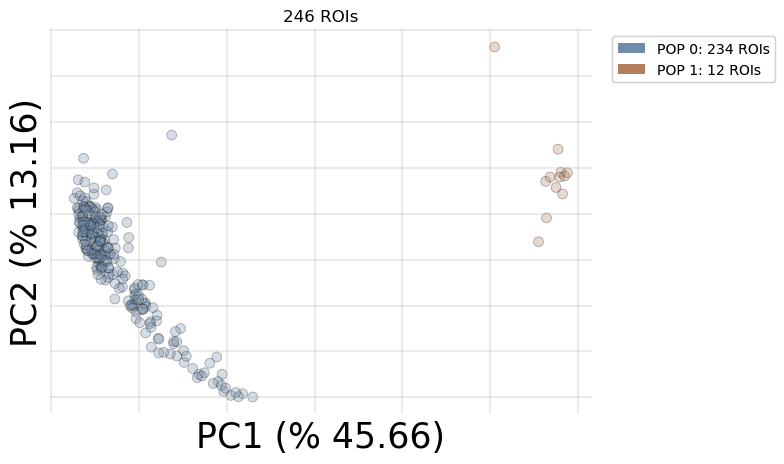

In [139]:
pops = rec_.get_populations(list(rec_.cells.keys()),k=2)

In [180]:
import h5py

with h5py.File('demo1_extracted_data.hdf5', "r") as h5file:
    print(h5file['cells']['1'].keys())

<KeysViewHDF5 ['analyzed_trials', 'id', 'label', 'qi', 'responsive']>
